In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Сразу избавляемся от обоих столбцов с идентификаторами - они нам не понадобятся.
# Также избавимся от столбца с фамилиями клиентов - так как мы больше не живём
# в сословном обществе, фамилия клиента никак не должна влиять на его поведение.
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Для начала просто посмотрим на соотношение числа ушедших и оставшихся клиентов:

In [3]:
exited = churn_data['Exited'].apply(lambda x: 'Ушедшие' 
                 if x==1 else 'Оставшиеся').value_counts()
print(exited)

Оставшиеся    7963
Ушедшие       2037
Name: Exited, dtype: int64


Как видим, ушедшие клиенты составляют примерно одну пятую часть от общего
числа клиентов. Немедленная катастрофа банку не грозит, но простор для 
стимуляции лояльности клиентов есть, и большой!

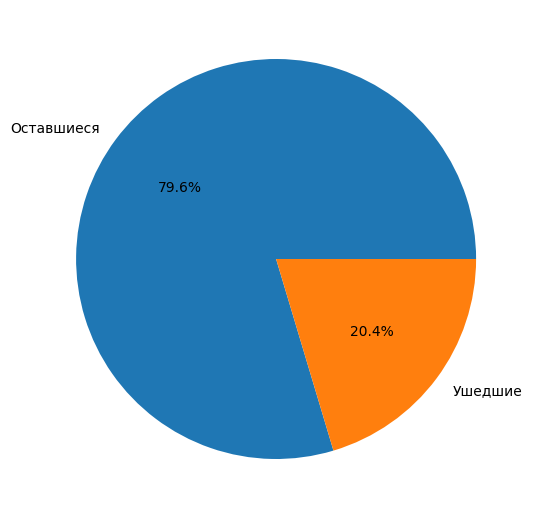

In [4]:
# Для наглядности визуализируем это соотношение в виде простейшей 
# круговой диаграммы:
fig_1 = plt.figure(figsize=(5, 5))
axes_1 = fig_1.add_axes([0, 0, 1, 1])
pie_labels = ['Оставшиеся', 'Ушедшие']
axes_1.pie(exited, labels = pie_labels, autopct='%.1f%%');

Посмотрим на распределение баланса пользователей...

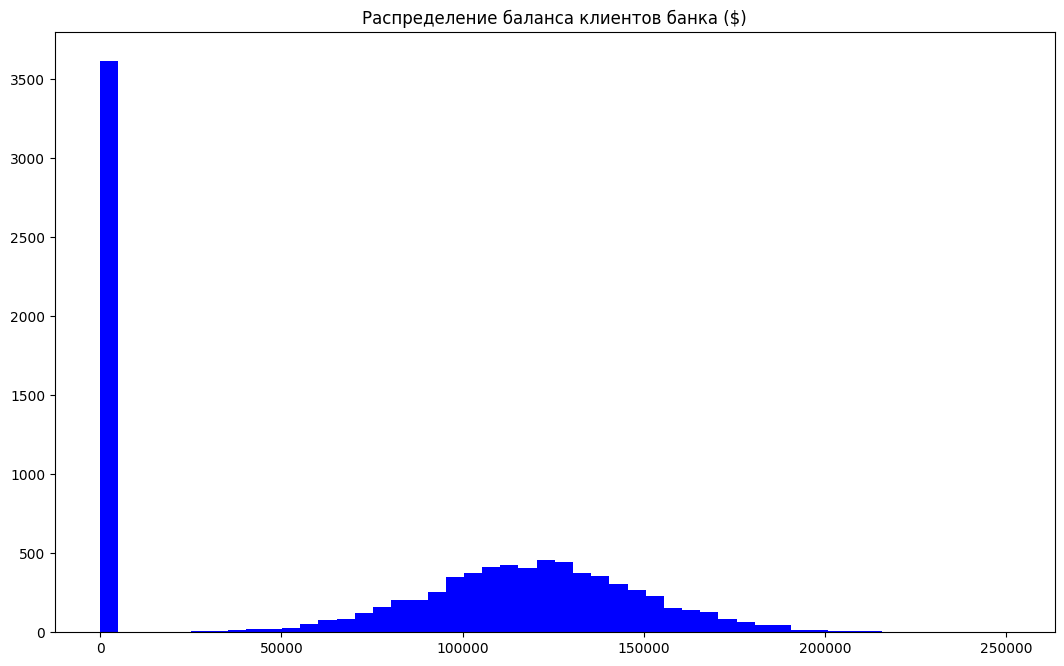

In [5]:
fig_2 = plt.figure(figsize=(10, 6))
axes_2 = fig_2.add_axes([0, 0, 1, 1])
axes_2.hist(x=churn_data['Balance'],
            color="blue", bins=50);
axes_2.set_title("Распределение баланса клиентов банка ($)");

Ой! Самое большое количество клиентов - с самыми маленькими суммами на счету.
Такие клиенты должны быть малоинтересны банку, но при этом сильно искажают распределение.
Отфильтуем наши данные, удалив записи о слишком маленьких счетах, и посмотрим на распределение ещё раз:

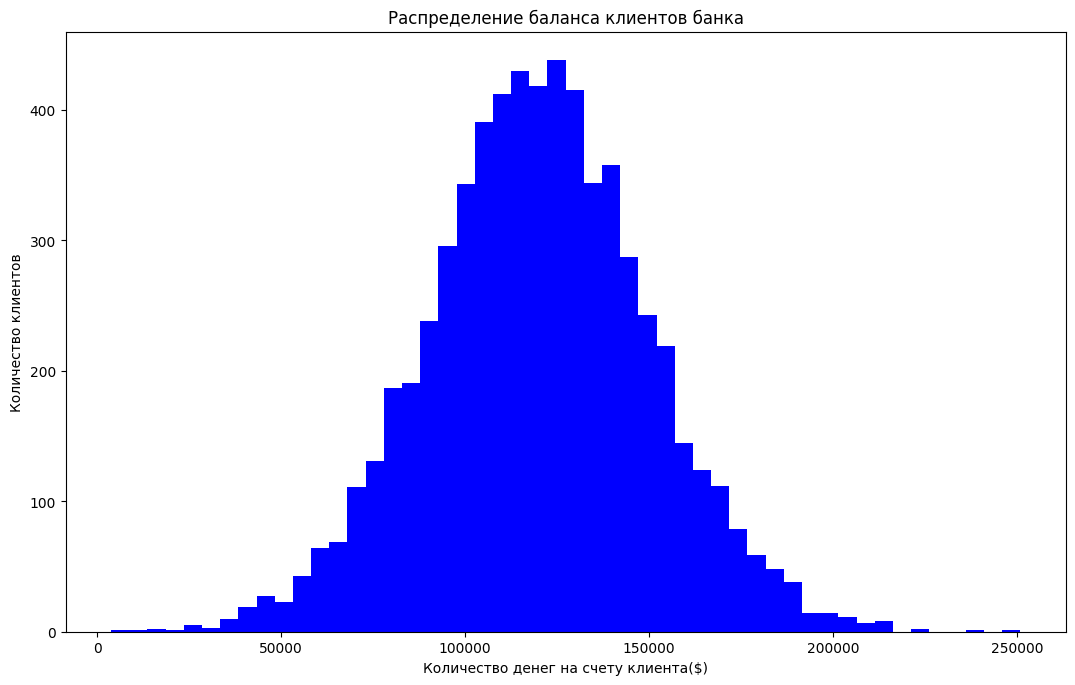

In [6]:
balances = churn_data[churn_data['Balance']>2500]['Balance']
fig_3 = plt.figure(figsize=(10, 6))
axes_3 = fig_3.add_axes([0, 0, 1, 1])
axes_3.hist(x=balances,
            color="blue", bins=50)
axes_3.set_title("Распределение баланса клиентов банка")
plt.xlabel('Количество денег на счету клиента($)')
plt.ylabel('Количество клиентов');

Как теперь можно увидеть на графике, "популярность" банковских вкладов без учёта очень маленьких
(менее 2500 долларов) очень мала (исчисяетется всего десятками или даже единичными клиентами)
при суммах на балансе, меньших примерно 60 тысяч долларов, и больших примерно 180 тысяч долларов.
Больше же всего богатых клиентов имеют на своём счету примерно от 120 то 140 тысяч долларов.
Возможно, при разработке программы лояльности имеет смысл концентриоваться в первую очередь
на клиентах с суммами вклада в этом диапазоне.

In [5]:
# Для более красивого отображения нескольких следующих графиков подадим в них дубликат
# столбца Exited, представляющий информацию в текстовом, а не в числовом виде
# вместо самого этого столбца.
churn_data['Exited(Text)'] = churn_data['Exited'].apply(lambda x:'Ушли' if x==1 else 'Остались')

Теперь посмотрим на распределение баланса клиентов в разрезе признака оттока:

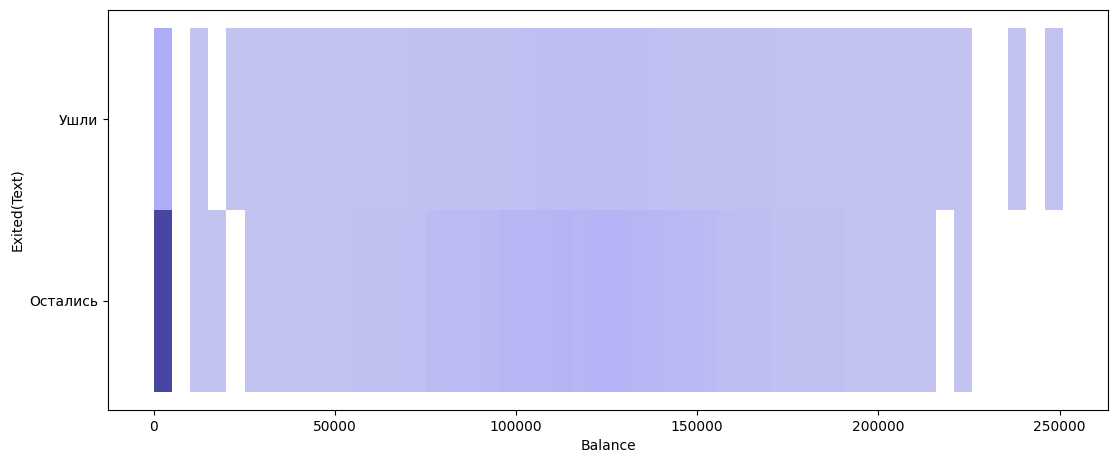

In [9]:
fig_4 = plt.figure(figsize=(10, 4))
axes_4 = fig_4.add_axes([0, 0, 1, 1])
sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited(Text)',
    bins=50,
    color='blue',
    ax=axes_4
);


Если проигнорировать малоинтересных банку клиентов с очень маленькими суммами на счёте
(крайний левый столбец), то можно увидеть, что в основном, размеры вкладов у большинства
клиентов не зависят от того, ушли они или же остались. Однако, с очень большими вкладами
ситуация другая: как видно из графика, все клиенты с максимальными (больше ~225000 долларов)
суммами вкладов ушли из банка. Возможно, что-то в работе банка или в предоставляемых им услугах
является некомфортным для держателей больших вкладов. Можно, например, предположить, что банк
ограничивает максимальную сумму снятия денег со счёта, что затрудняет самым богатым клиентам распоряжение
их вкладами.

Теперь посмотрим на распределение возраста клиентов в разрезе признака оттока:

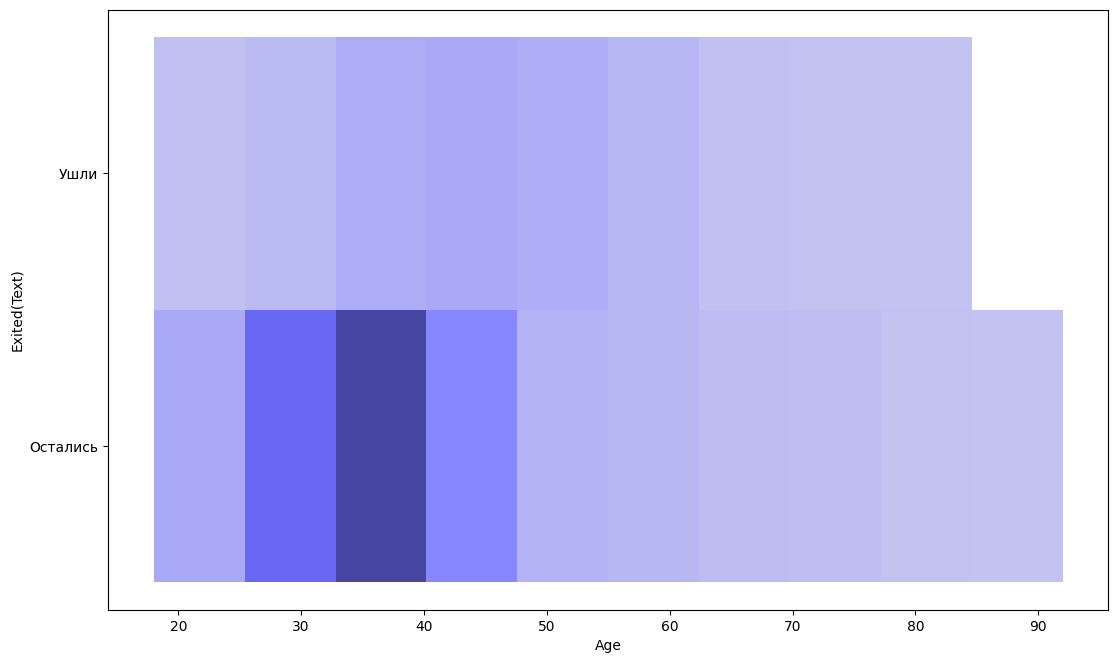

In [10]:
fig_5 = plt.figure(figsize=(10, 6))
axes_5 = fig_5.add_axes([0, 0, 1, 1])
sns.histplot(
    data=churn_data,
    x='Age',
    y='Exited(Text)',
    bins=10,
    color='blue',
    ax=axes_5
);

Среди оставшихся клиентов есть клиенты сильно старше восьмидесяти. Это подозрительно, т.к.
здравый смысл подсказывает, что у престарелых не должно быть большой мотивации откладывать
деньги на будущее. Возможно, банку стоит проверить этих клиентов на предмет ошибки в данных или фиктивности.
Как ушедших, так и оставшихся клиентов больше всего в возрастном диапазоне от ~33 до 40 лет.
Я бы посоветовал банку сконцентрировать усилия по повышению лояльности клиентов на этой возрастной категории.

Кто чаще уходит из банка - мужчины или женщины? Как можно увидеть на диаграмме ниже, женщины.

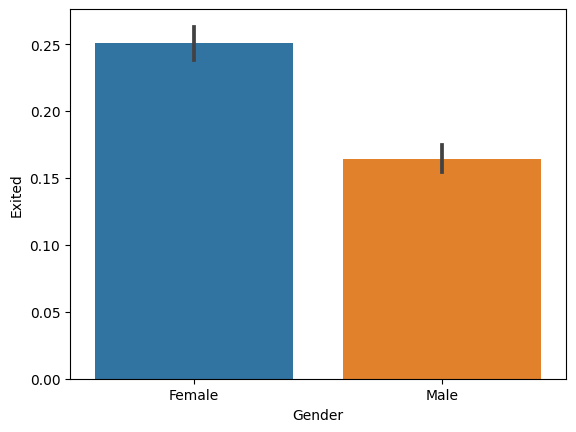

In [5]:
barplot = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited'
)

Также, неактивные клиенты уходят заметно чаще активных. Возможно, банку стоит задуматься о программе по повышению лояльности неактивных клиентов, например, скидках клиентам, которые решили воспользоваться услугами банка после длительного периода неактивности, или начислению бонусного процента на счёт неактивных в течение длительного периода времени клиентов.

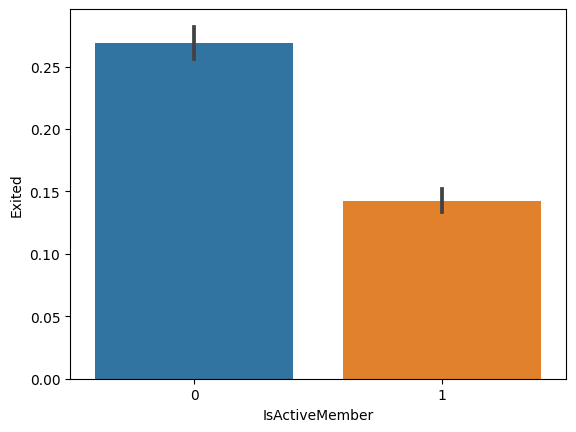

In [6]:
barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='Exited'
)

А вот как отток клиетов зависит от числа приобретённых банком услуг. Наблюдаем весьма интересную ситуацию. Практически все клиенты, использовавшие четыре услуги, ушли из банка. Из клиентов, использовавших три услуги, впоследствии ушло более 80%. Зато среди клиентов, использовавших две услуги, доля ушедших клиентов минимальна.

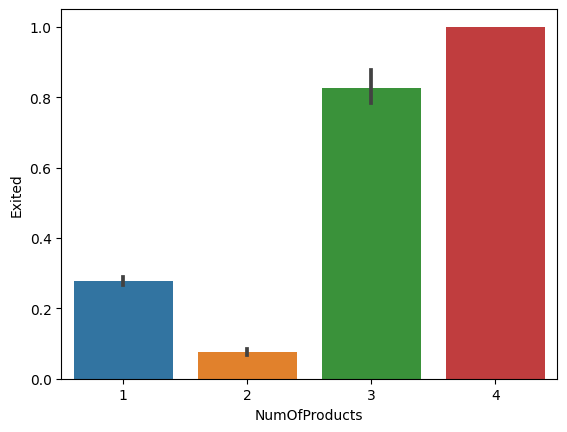

In [8]:
barplot_3 = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
)

Посмотрим, как связаны кредитный рейтинг клиента и его предполагаемая зарплата.

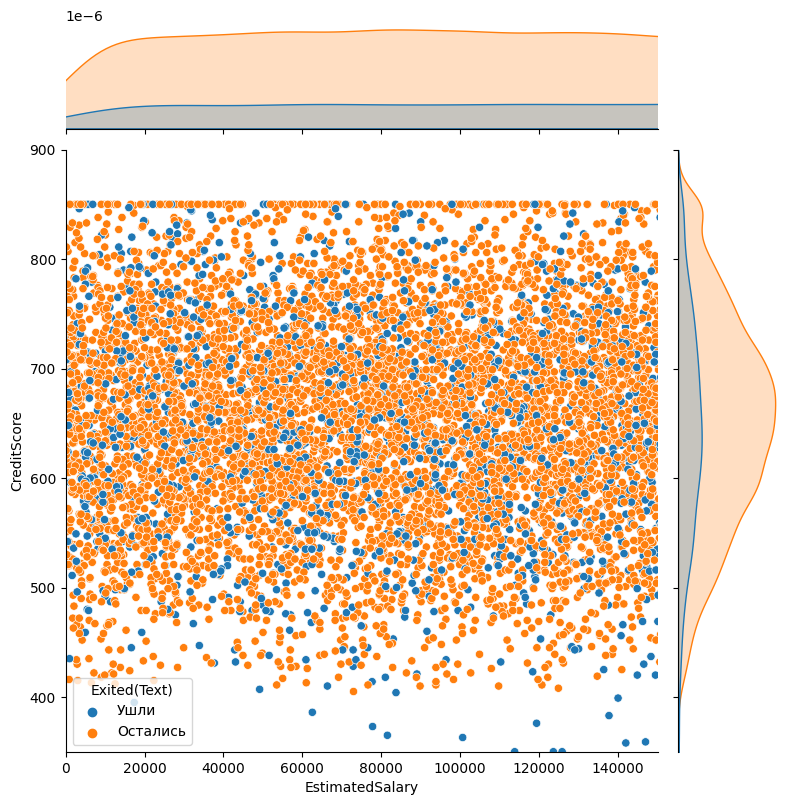

In [9]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited(Text)',
    xlim = (0, 150000),
    ylim = (350, 900),
    height=8,
)

Как можно увидеть, никакой очевидной корелляции между кредитным рейтингом клиета и его предполагаемой
зарплатой не наблюдается.

Визуализируем на тепловой картограмме, в какой стране доля ушедших клиентов больше.

In [10]:
churn_data_geo = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

px.choropleth(
    data_frame=churn_data_geo,
    locations='Geography',
    locationmode = 'country names',
    color = 'Exited'
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'Geography=%{location}<br>Exited=%{z}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['France', 'Germany', 'Spain'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([0.16154767, 0.32443204, 0.16673395])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Exited'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...'}
})

Как видно, доля ушедших клиентов больше всего в Германии - почти в два раза больше, чем у других стран в датасете.
Делать какие-либо выводы из этого затруднительно из-за того, что у нас есть данные только о трёх странах, но
можно предположить что, скорее всего, в рассматриваемый период времени курс доллара к марке резко упал, и много
людей предпочли обналичить все свои вклады в марках (либо наоборот, курс доллара резко вырос, и много людей
предпочли обналичить все свои долларовые счета).

Наконец, превратим кредитный рейтинг клиентов в категориальный признак, и построим тепловую карту
лояльности клиентов банка по категориям кредитного рейтинга и количества лет, на протяжении которого
они пользовались его услугами.

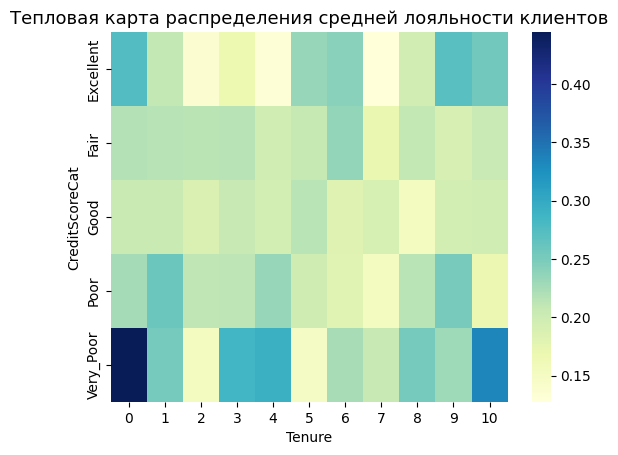

In [12]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта распределения средней лояльности клиентов', fontsize=13);

Как можно увидеть, следующие категории клиентов уходят чаще всего: клиенты с очень плохой категорией кредитного
рейтинга, пользовавшиеся услугами банка меньше года; клиенты с очень плохой категорией кредитного рейтинга, 
пользовавшиеся услугами банка в течение десятилетия; клиенты с превосходной категорией кредитного рейтинга,
пользовавшиеся услугами банка меньше года.